In [71]:
import pandas as pd
import missingno
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import glob
import time

In [2]:
allFiles = glob.glob("SALESORDER/*.csv")
dictionary = {}
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    f = file_.split("/")[1].split(".")[0]
    dictionary[f] = df

In [3]:
dictionary.keys()

dict_keys(['PRODUCT', 'CASE', 'SALESORDER', 'ACCOUNT', 'SALESORDERLINEITEM', 'SURVEY'])

In [4]:
salesorder = dictionary["SALESORDER"]
salesorderlineitem = dictionary["SALESORDERLINEITEM"]
new = salesorderlineitem.join(salesorder.set_index('ID'), on='SALES_ORDER__C', lsuffix='_L')
new = new[["ID","AGREEMENT_END_DATE__C","AGREEMENT_START_DATE__C","PRODUCT__C","QUANTITY__C","TYPE__C","CUSTOMER__C"]]
new = new.dropna(subset = ["CUSTOMER__C","AGREEMENT_END_DATE__C"])
new.shape

(261506, 7)

In [5]:
new["AGREEMENT_END_DATE__C"] = pd.to_datetime(new['AGREEMENT_END_DATE__C'])
new["AGREEMENT_START_DATE__C"] = pd.to_datetime(new['AGREEMENT_START_DATE__C'])
t = new[new["AGREEMENT_END_DATE__C"] <= datetime.datetime(2018, 8, 1)]
t.shape

(192023, 7)

In [6]:
c = t.groupby(["CUSTOMER__C"])[['AGREEMENT_END_DATE__C', "CUSTOMER__C"]].agg('max').reset_index(drop=True)
c.shape

(16252, 2)

In [7]:
renew = []
for index, row in c.iterrows():
    time1 = time.time()
    a = row["AGREEMENT_END_DATE__C"]
    b = row["CUSTOMER__C"]
    temp = new[new["CUSTOMER__C"] == b]
    if temp["AGREEMENT_START_DATE__C"].max() > a:
        renew.append([a,b])
    time2 = time.time()
    print(index, time1-time2)

0 -0.01991415023803711
1 -0.02005481719970703
2 -0.01919698715209961
3 -0.019051074981689453
4 -0.018718957901000977
5 -0.018806934356689453
6 -0.01934504508972168
7 -0.01910996437072754
8 -0.01891303062438965
9 -0.01898479461669922
10 -0.01914501190185547
11 -0.019785165786743164
12 -0.02097606658935547
13 -0.01922917366027832
14 -0.019059181213378906
15 -0.01921987533569336
16 -0.019812822341918945
17 -0.018904924392700195
18 -0.01894378662109375
19 -0.018730878829956055
20 -0.019503116607666016
21 -0.018864154815673828
22 -0.020081043243408203
23 -0.02204298973083496
24 -0.019837141036987305
25 -0.019034862518310547
26 -0.01912093162536621
27 -0.019212961196899414
28 -0.01885509490966797
29 -0.0186920166015625
30 -0.019176959991455078
31 -0.018800020217895508
32 -0.01890110969543457
33 -0.019273042678833008
34 -0.021372079849243164
35 -0.019530057907104492
36 -0.019215106964111328
37 -0.019498109817504883
38 -0.019757986068725586
39 -0.01904606819152832
40 -0.01910090446472168
41 -0

333 -0.0197751522064209
334 -0.02109503746032715
335 -0.01913905143737793
336 -0.018979787826538086
337 -0.018985986709594727
338 -0.01903986930847168
339 -0.01883983612060547
340 -0.0186917781829834
341 -0.019055843353271484
342 -0.019083023071289062
343 -0.018887042999267578
344 -0.019640207290649414
345 -0.0210568904876709
346 -0.019444942474365234
347 -0.019227027893066406
348 -0.018748998641967773
349 -0.01885080337524414
350 -0.018615007400512695
351 -0.018913984298706055
352 -0.018843889236450195
353 -0.01897907257080078
354 -0.01989603042602539
355 -0.01947307586669922
356 -0.020568132400512695
357 -0.019845008850097656
358 -0.01878499984741211
359 -0.01886916160583496
360 -0.01883697509765625
361 -0.018825054168701172
362 -0.018756866455078125
363 -0.019866943359375
364 -0.019155025482177734
365 -0.019093990325927734
366 -0.0195770263671875
367 -0.020076990127563477
368 -0.01981496810913086
369 -0.018797874450683594
370 -0.019092798233032227
371 -0.01901412010192871
372 -0.019

658 -0.01971292495727539
659 -0.020514965057373047
660 -0.01952195167541504
661 -0.019335031509399414
662 -0.019241809844970703
663 -0.01938605308532715
664 -0.01865410804748535
665 -0.019593000411987305
666 -0.022655010223388672
667 -0.02039504051208496
668 -0.020321130752563477
669 -0.020492076873779297
670 -0.02284717559814453
671 -0.02050495147705078
672 -0.019279956817626953
673 -0.01938605308532715
674 -0.01871204376220703
675 -0.01878190040588379
676 -0.018445968627929688
677 -0.01934194564819336
678 -0.018690109252929688
679 -0.01905202865600586
680 -0.019457101821899414
681 -0.02088189125061035
682 -0.019695043563842773
683 -0.01925492286682129
684 -0.01894402503967285
685 -0.018936872482299805
686 -0.019056081771850586
687 -0.01868414878845215
688 -0.019387006759643555
689 -0.019356966018676758
690 -0.018790006637573242
691 -0.019659996032714844
692 -0.019047975540161133
693 -0.02083110809326172
694 -0.019474029541015625
695 -0.019271135330200195
696 -0.019251108169555664
697

986 -0.01951909065246582
987 -0.021023035049438477
988 -0.020083189010620117
989 -0.019328832626342773
990 -0.019129037857055664
991 -0.019706010818481445
992 -0.019498109817504883
993 -0.018803119659423828
994 -0.018845081329345703
995 -0.018989086151123047
996 -0.019762039184570312
997 -0.02018594741821289
998 -0.021157026290893555
999 -0.01940011978149414
1000 -0.018825054168701172
1001 -0.019289016723632812
1002 -0.019016027450561523
1003 -0.01937103271484375
1004 -0.018920183181762695
1005 -0.01886296272277832
1006 -0.019014835357666016
1007 -0.01910400390625
1008 -0.019002914428710938
1009 -0.01892709732055664
1010 -0.020932912826538086
1011 -0.019937992095947266
1012 -0.019019126892089844
1013 -0.019347190856933594
1014 -0.019045114517211914
1015 -0.01893019676208496
1016 -0.01910710334777832
1017 -0.019160032272338867
1018 -0.019037961959838867
1019 -0.01881098747253418
1020 -0.01960587501525879
1021 -0.021197080612182617
1022 -0.01976299285888672
1023 -0.019274234771728516
102

1304 -0.01935601234436035
1305 -0.02067399024963379
1306 -0.019668102264404297
1307 -0.019488096237182617
1308 -0.019156932830810547
1309 -0.018806934356689453
1310 -0.02006697654724121
1311 -0.01922917366027832
1312 -0.019190073013305664
1313 -0.019078969955444336
1314 -0.01887798309326172
1315 -0.01888895034790039
1316 -0.01934814453125
1317 -0.020926952362060547
1318 -0.019747018814086914
1319 -0.01945805549621582
1320 -0.018950939178466797
1321 -0.019155025482177734
1322 -0.018915891647338867
1323 -0.019006967544555664
1324 -0.018829822540283203
1325 -0.018841981887817383
1326 -0.018941164016723633
1327 -0.019345998764038086
1328 -0.020889997482299805
1329 -0.01944899559020996
1330 -0.01930999755859375
1331 -0.019784927368164062
1332 -0.019119977951049805
1333 -0.01894402503967285
1334 -0.01907205581665039
1335 -0.018830060958862305
1336 -0.018977880477905273
1337 -0.0190889835357666
1338 -0.018700122833251953
1339 -0.019635915756225586
1340 -0.02088189125061035
1341 -0.01972603797

1622 -0.019575119018554688
1623 -0.020734071731567383
1624 -0.019495010375976562
1625 -0.01941394805908203
1626 -0.018792152404785156
1627 -0.01983189582824707
1628 -0.018742084503173828
1629 -0.01873612403869629
1630 -0.01898503303527832
1631 -0.019121170043945312
1632 -0.019805908203125
1633 -0.019921064376831055
1634 -0.020747900009155273
1635 -0.020385026931762695
1636 -0.020423173904418945
1637 -0.019659042358398438
1638 -0.01906108856201172
1639 -0.018616914749145508
1640 -0.018592119216918945
1641 -0.01885199546813965
1642 -0.019188880920410156
1643 -0.019158124923706055
1644 -0.020305871963500977
1645 -0.02058696746826172
1646 -0.01955389976501465
1647 -0.019279003143310547
1648 -0.01943492889404297
1649 -0.01925492286682129
1650 -0.018791913986206055
1651 -0.019430875778198242
1652 -0.02271413803100586
1653 -0.019536972045898438
1654 -0.020133018493652344
1655 -0.02029585838317871
1656 -0.02099895477294922
1657 -0.019371986389160156
1658 -0.020166873931884766
1659 -0.019813060

1939 -0.020083904266357422
1940 -0.020869970321655273
1941 -0.019433021545410156
1942 -0.019524097442626953
1943 -0.019215822219848633
1944 -0.01871800422668457
1945 -0.018663883209228516
1946 -0.018870115280151367
1947 -0.019212007522583008
1948 -0.018839120864868164
1949 -0.018938064575195312
1950 -0.019055843353271484
1951 -0.019517898559570312
1952 -0.021921157836914062
1953 -0.020322084426879883
1954 -0.019288063049316406
1955 -0.018908977508544922
1956 -0.019070148468017578
1957 -0.019260883331298828
1958 -0.018489837646484375
1959 -0.01988697052001953
1960 -0.01987290382385254
1961 -0.018947839736938477
1962 -0.019611120223999023
1963 -0.019062042236328125
1964 -0.021296024322509766
1965 -0.019131183624267578
1966 -0.019311904907226562
1967 -0.019754886627197266
1968 -0.019190073013305664
1969 -0.019237995147705078
1970 -0.018908023834228516
1971 -0.019222021102905273
1972 -0.01914811134338379
1973 -0.019053936004638672
1974 -0.019758939743041992
1975 -0.020643949508666992
1976 

2254 -0.019517898559570312
2255 -0.021403074264526367
2256 -0.019443035125732422
2257 -0.019190073013305664
2258 -0.019101858139038086
2259 -0.018905162811279297
2260 -0.018867015838623047
2261 -0.018889904022216797
2262 -0.018666982650756836
2263 -0.019282817840576172
2264 -0.019021034240722656
2265 -0.019563913345336914
2266 -0.0211029052734375
2267 -0.01982593536376953
2268 -0.019637107849121094
2269 -0.01904606819152832
2270 -0.01985001564025879
2271 -0.019250869750976562
2272 -0.019076824188232422
2273 -0.01915287971496582
2274 -0.018785953521728516
2275 -0.019298076629638672
2276 -0.019581079483032227
2277 -0.02091813087463379
2278 -0.019707918167114258
2279 -0.019079923629760742
2280 -0.018917083740234375
2281 -0.019053936004638672
2282 -0.019377946853637695
2283 -0.019303083419799805
2284 -0.019195079803466797
2285 -0.018884897232055664
2286 -0.019112110137939453
2287 -0.019012928009033203
2288 -0.01975107192993164
2289 -0.020554065704345703
2290 -0.019646883010864258
2291 -0.0

2569 -0.019842147827148438
2570 -0.020375967025756836
2571 -0.01938486099243164
2572 -0.019199132919311523
2573 -0.019313812255859375
2574 -0.019247055053710938
2575 -0.01933884620666504
2576 -0.018950939178466797
2577 -0.01860499382019043
2578 -0.019276857376098633
2579 -0.01970195770263672
2580 -0.020567893981933594
2581 -0.021678924560546875
2582 -0.019576072692871094
2583 -0.019526958465576172
2584 -0.01874709129333496
2585 -0.01848006248474121
2586 -0.019015073776245117
2587 -0.0188901424407959
2588 -0.01922011375427246
2589 -0.018793106079101562
2590 -0.018973112106323242
2591 -0.019618988037109375
2592 -0.02109980583190918
2593 -0.019676923751831055
2594 -0.01984691619873047
2595 -0.019063949584960938
2596 -0.019099950790405273
2597 -0.018656015396118164
2598 -0.019060850143432617
2599 -0.01896214485168457
2600 -0.019097089767456055
2601 -0.0196988582611084
2602 -0.0193021297454834
2603 -0.01974320411682129
2604 -0.020576000213623047
2605 -0.019051074981689453
2606 -0.0190730094

2887 -0.020151853561401367
2888 -0.01873183250427246
2889 -0.020261049270629883
2890 -0.019898176193237305
2891 -0.01877117156982422
2892 -0.019108057022094727
2893 -0.01916217803955078
2894 -0.01901388168334961
2895 -0.019036054611206055
2896 -0.018830060958862305
2897 -0.019252777099609375
2898 -0.018767833709716797
2899 -0.019768953323364258
2900 -0.021110057830810547
2901 -0.01935887336730957
2902 -0.018876075744628906
2903 -0.01894998550415039
2904 -0.01888298988342285
2905 -0.019273042678833008
2906 -0.01900196075439453
2907 -0.01891183853149414
2908 -0.01930403709411621
2909 -0.018861055374145508
2910 -0.01929497718811035
2911 -0.020795106887817383
2912 -0.01958489418029785
2913 -0.01956486701965332
2914 -0.01879405975341797
2915 -0.018998146057128906
2916 -0.0192868709564209
2917 -0.019062042236328125
2918 -0.0191800594329834
2919 -0.019194841384887695
2920 -0.018918991088867188
2921 -0.0195009708404541
2922 -0.021368026733398438
2923 -0.019426822662353516
2924 -0.0192430019378

3204 -0.01959395408630371
3205 -0.020808935165405273
3206 -0.019793987274169922
3207 -0.018858909606933594
3208 -0.019076108932495117
3209 -0.018475055694580078
3210 -0.0188140869140625
3211 -0.01919412612915039
3212 -0.01890707015991211
3213 -0.019076108932495117
3214 -0.018921852111816406
3215 -0.018924951553344727
3216 -0.019690990447998047
3217 -0.02072596549987793
3218 -0.01943182945251465
3219 -0.01907205581665039
3220 -0.019151926040649414
3221 -0.019465923309326172
3222 -0.01886296272277832
3223 -0.019026994705200195
3224 -0.018846988677978516
3225 -0.018754959106445312
3226 -0.0190279483795166
3227 -0.019986867904663086
3228 -0.021030187606811523
3229 -0.019311189651489258
3230 -0.018878936767578125
3231 -0.018729209899902344
3232 -0.019176006317138672
3233 -0.018893003463745117
3234 -0.01856708526611328
3235 -0.018691062927246094
3236 -0.0189669132232666
3237 -0.01876091957092285
3238 -0.019964933395385742
3239 -0.020323991775512695
3240 -0.01978898048400879
3241 -0.019275188

3522 -0.019528865814208984
3523 -0.020151853561401367
3524 -0.019783973693847656
3525 -0.01920294761657715
3526 -0.019271135330200195
3527 -0.018949031829833984
3528 -0.01937103271484375
3529 -0.019761085510253906
3530 -0.01943492889404297
3531 -0.019337892532348633
3532 -0.019057035446166992
3533 -0.0191800594329834
3534 -0.02073502540588379
3535 -0.020071029663085938
3536 -0.019343852996826172
3537 -0.019281864166259766
3538 -0.01896500587463379
3539 -0.018958091735839844
3540 -0.01898980140686035
3541 -0.019016027450561523
3542 -0.01907181739807129
3543 -0.018906831741333008
3544 -0.01975083351135254
3545 -0.019381999969482422
3546 -0.021366119384765625
3547 -0.0193328857421875
3548 -0.01938796043395996
3549 -0.018960952758789062
3550 -0.0187530517578125
3551 -0.01897406578063965
3552 -0.018865108489990234
3553 -0.019247055053710938
3554 -0.01930093765258789
3555 -0.018921852111816406
3556 -0.019524097442626953
3557 -0.020973920822143555
3558 -0.019673824310302734
3559 -0.0193619728

3832 -0.01947808265686035
3833 -0.02103400230407715
3834 -0.01952981948852539
3835 -0.020014047622680664
3836 -0.019165992736816406
3837 -0.01889801025390625
3838 -0.018674850463867188
3839 -0.0188748836517334
3840 -0.01879096031188965
3841 -0.01912713050842285
3842 -0.019156932830810547
3843 -0.019110918045043945
3844 -0.019527912139892578
3845 -0.02143692970275879
3846 -0.020067930221557617
3847 -0.019468069076538086
3848 -0.01903986930847168
3849 -0.01899099349975586
3850 -0.01935410499572754
3851 -0.019010066986083984
3852 -0.019320011138916016
3853 -0.018858909606933594
3854 -0.018815994262695312
3855 -0.019403934478759766
3856 -0.02110910415649414
3857 -0.01969599723815918
3858 -0.019023895263671875
3859 -0.019977092742919922
3860 -0.019177913665771484
3861 -0.019088029861450195
3862 -0.0193328857421875
3863 -0.018822193145751953
3864 -0.01928997039794922
3865 -0.01864314079284668
3866 -0.019047975540161133
3867 -0.019674062728881836
3868 -0.02082514762878418
3869 -0.019684076309

4147 -0.01992321014404297
4148 -0.020706892013549805
4149 -0.01971602439880371
4150 -0.019345998764038086
4151 -0.019222021102905273
4152 -0.019284963607788086
4153 -0.019294023513793945
4154 -0.018986940383911133
4155 -0.018983125686645508
4156 -0.01887989044189453
4157 -0.019145965576171875
4158 -0.020032882690429688
4159 -0.020884037017822266
4160 -0.01927804946899414
4161 -0.01883411407470703
4162 -0.019298076629638672
4163 -0.019701004028320312
4164 -0.019845962524414062
4165 -0.01889491081237793
4166 -0.01900792121887207
4167 -0.019330978393554688
4168 -0.019299030303955078
4169 -0.01898193359375
4170 -0.0197451114654541
4171 -0.020745038986206055
4172 -0.02223992347717285
4173 -0.02009892463684082
4174 -0.019078969955444336
4175 -0.019342899322509766
4176 -0.021914958953857422
4177 -0.019891977310180664
4178 -0.019407033920288086
4179 -0.01885080337524414
4180 -0.019345998764038086
4181 -0.0211489200592041
4182 -0.0193939208984375
4183 -0.019607067108154297
4184 -0.0195419788360

4459 -0.02025604248046875
4460 -0.02048492431640625
4461 -0.019477128982543945
4462 -0.01924419403076172
4463 -0.019345998764038086
4464 -0.01904296875
4465 -0.01932692527770996
4466 -0.019253969192504883
4467 -0.0192718505859375
4468 -0.019131183624267578
4469 -0.019763946533203125
4470 -0.019074201583862305
4471 -0.019301891326904297
4472 -0.021145105361938477
4473 -0.019906044006347656
4474 -0.019435882568359375
4475 -0.01920485496520996
4476 -0.018990039825439453
4477 -0.019043922424316406
4478 -0.019338130950927734
4479 -0.019010066986083984
4480 -0.01882004737854004
4481 -0.019259929656982422
4482 -0.01921391487121582
4483 -0.019993066787719727
4484 -0.02151203155517578
4485 -0.01958608627319336
4486 -0.01939702033996582
4487 -0.01902008056640625
4488 -0.01914191246032715
4489 -0.018944978713989258
4490 -0.019168853759765625
4491 -0.0187680721282959
4492 -0.018860816955566406
4493 -0.019347190856933594
4494 -0.02002692222595215
4495 -0.020615816116333008
4496 -0.01902604103088379

4775 -0.019593000411987305
4776 -0.020379066467285156
4777 -0.01998615264892578
4778 -0.018919944763183594
4779 -0.018873929977416992
4780 -0.01884293556213379
4781 -0.019331932067871094
4782 -0.018967151641845703
4783 -0.019222021102905273
4784 -0.01927804946899414
4785 -0.018823862075805664
4786 -0.019711017608642578
4787 -0.020756006240844727
4788 -0.020140886306762695
4789 -0.01925492286682129
4790 -0.019073963165283203
4791 -0.019064903259277344
4792 -0.018864870071411133
4793 -0.01897287368774414
4794 -0.02023911476135254
4795 -0.020090103149414062
4796 -0.01897287368774414
4797 -0.019059181213378906
4798 -0.020889997482299805
4799 -0.01979804039001465
4800 -0.01932501792907715
4801 -0.01912093162536621
4802 -0.01913285255432129
4803 -0.01887798309326172
4804 -0.018915891647338867
4805 -0.018709897994995117
4806 -0.01876997947692871
4807 -0.018741846084594727
4808 -0.019443988800048828
4809 -0.02067112922668457
4810 -0.019318103790283203
4811 -0.025187969207763672
4812 -0.0189309

5085 -0.01960611343383789
5086 -0.020576953887939453
5087 -0.020390987396240234
5088 -0.019465923309326172
5089 -0.019021034240722656
5090 -0.019043922424316406
5091 -0.019114017486572266
5092 -0.019236087799072266
5093 -0.019164085388183594
5094 -0.019242048263549805
5095 -0.018817901611328125
5096 -0.019723892211914062
5097 -0.021592140197753906
5098 -0.019309043884277344
5099 -0.019272804260253906
5100 -0.01921987533569336
5101 -0.018851041793823242
5102 -0.01894402503967285
5103 -0.019958019256591797
5104 -0.019404888153076172
5105 -0.018959999084472656
5106 -0.018909931182861328
5107 -0.019516944885253906
5108 -0.020958900451660156
5109 -0.019682884216308594
5110 -0.019314050674438477
5111 -0.019354820251464844
5112 -0.019088029861450195
5113 -0.019239187240600586
5114 -0.01917290687561035
5115 -0.018999814987182617
5116 -0.019401073455810547
5117 -0.0186460018157959
5118 -0.01990985870361328
5119 -0.020689964294433594
5120 -0.01923513412475586
5121 -0.0193328857421875
5122 -0.019

5398 -0.020015954971313477
5399 -0.021309852600097656
5400 -0.021438121795654297
5401 -0.020364999771118164
5402 -0.019422054290771484
5403 -0.01917290687561035
5404 -0.019313812255859375
5405 -0.01905512809753418
5406 -0.01937389373779297
5407 -0.019160032272338867
5408 -0.019789934158325195
5409 -0.020149946212768555
5410 -0.021049022674560547
5411 -0.01953721046447754
5412 -0.01929783821105957
5413 -0.01879119873046875
5414 -0.019334077835083008
5415 -0.019488811492919922
5416 -0.019156932830810547
5417 -0.018961191177368164
5418 -0.019041061401367188
5419 -0.019176959991455078
5420 -0.019687175750732422
5421 -0.02092599868774414
5422 -0.019718170166015625
5423 -0.01843094825744629
5424 -0.019301891326904297
5425 -0.019609928131103516
5426 -0.02296900749206543
5427 -0.019601106643676758
5428 -0.01889204978942871
5429 -0.019243955612182617
5430 -0.019042015075683594
5431 -0.019585132598876953
5432 -0.022678852081298828
5433 -0.02058100700378418
5434 -0.02060699462890625
5435 -0.01931

5710 -0.019991159439086914
5711 -0.020389080047607422
5712 -0.019965171813964844
5713 -0.019787073135375977
5714 -0.019244909286499023
5715 -0.019860029220581055
5716 -0.019975900650024414
5717 -0.020869016647338867
5718 -0.01959514617919922
5719 -0.01910090446472168
5720 -0.019770145416259766
5721 -0.021225929260253906
5722 -0.019472837448120117
5723 -0.019263029098510742
5724 -0.01949000358581543
5725 -0.01963186264038086
5726 -0.019337892532348633
5727 -0.018898963928222656
5728 -0.01906108856201172
5729 -0.01912689208984375
5730 -0.01918196678161621
5731 -0.020393848419189453
5732 -0.02087688446044922
5733 -0.01955699920654297
5734 -0.01912403106689453
5735 -0.019150972366333008
5736 -0.019423961639404297
5737 -0.019640207290649414
5738 -0.019411802291870117
5739 -0.018828153610229492
5740 -0.019126176834106445
5741 -0.019850969314575195
5742 -0.02074909210205078
5743 -0.020766019821166992
5744 -0.01938796043395996
5745 -0.01965188980102539
5746 -0.019247055053710938
5747 -0.019093

6028 -0.020475149154663086
6029 -0.020837068557739258
6030 -0.019819974899291992
6031 -0.019596099853515625
6032 -0.01874995231628418
6033 -0.019021987915039062
6034 -0.019224166870117188
6035 -0.0225369930267334
6036 -0.028644800186157227
6037 -0.01986098289489746
6038 -0.019428014755249023
6039 -0.020427942276000977
6040 -0.021220922470092773
6041 -0.01960587501525879
6042 -0.01935887336730957
6043 -0.0193178653717041
6044 -0.020927906036376953
6045 -0.019917011260986328
6046 -0.0196380615234375
6047 -0.01919102668762207
6048 -0.01895904541015625
6049 -0.01949596405029297
6050 -0.02000284194946289
6051 -0.021509885787963867
6052 -0.01945209503173828
6053 -0.019322872161865234
6054 -0.019613981246948242
6055 -0.01925206184387207
6056 -0.019145965576171875
6057 -0.019114017486572266
6058 -0.019160032272338867
6059 -0.019340991973876953
6060 -0.018904924392700195
6061 -0.019442081451416016
6062 -0.02081894874572754
6063 -0.01980304718017578
6064 -0.01972198486328125
6065 -0.020234107971

6339 -0.0197598934173584
6340 -0.020927906036376953
6341 -0.020920991897583008
6342 -0.020040035247802734
6343 -0.019385814666748047
6344 -0.019268035888671875
6345 -0.019115924835205078
6346 -0.019862890243530273
6347 -0.01924300193786621
6348 -0.019594907760620117
6349 -0.019310951232910156
6350 -0.02172708511352539
6351 -0.020394086837768555
6352 -0.019723892211914062
6353 -0.018800973892211914
6354 -0.01953911781311035
6355 -0.019429922103881836
6356 -0.020282983779907227
6357 -0.019114017486572266
6358 -0.018835067749023438
6359 -0.0192568302154541
6360 -0.019344806671142578
6361 -0.020401954650878906
6362 -0.021068811416625977
6363 -0.01990795135498047
6364 -0.019301176071166992
6365 -0.019554853439331055
6366 -0.019716978073120117
6367 -0.019269943237304688
6368 -0.019517183303833008
6369 -0.018918991088867188
6370 -0.019463062286376953
6371 -0.019423961639404297
6372 -0.02028799057006836
6373 -0.021028995513916016
6374 -0.019290924072265625
6375 -0.01995992660522461
6376 -0.019

6648 -0.020427942276000977
6649 -0.021300792694091797
6650 -0.019605159759521484
6651 -0.01941204071044922
6652 -0.02271294593811035
6653 -0.01916980743408203
6654 -0.019651174545288086
6655 -0.01940298080444336
6656 -0.01949787139892578
6657 -0.019314050674438477
6658 -0.019377946853637695
6659 -0.020561933517456055
6660 -0.021429061889648438
6661 -0.019588947296142578
6662 -0.019287109375
6663 -0.019070148468017578
6664 -0.019682884216308594
6665 -0.019320011138916016
6666 -0.019674062728881836
6667 -0.020774126052856445
6668 -0.01943802833557129
6669 -0.019531965255737305
6670 -0.0211489200592041
6671 -0.020756006240844727
6672 -0.019527912139892578
6673 -0.019624948501586914
6674 -0.019722938537597656
6675 -0.019309043884277344
6676 -0.01932501792907715
6677 -0.019420862197875977
6678 -0.019128084182739258
6679 -0.019303083419799805
6680 -0.019256114959716797
6681 -0.019741058349609375
6682 -0.021174192428588867
6683 -0.019978046417236328
6684 -0.019626855850219727
6685 -0.01925802

6965 -0.02009296417236328
6966 -0.020058870315551758
6967 -0.020989179611206055
6968 -0.01953601837158203
6969 -0.019312143325805664
6970 -0.019516944885253906
6971 -0.019044160842895508
6972 -0.01954817771911621
6973 -0.01929187774658203
6974 -0.01948404312133789
6975 -0.01958489418029785
6976 -0.0199739933013916
6977 -0.021188974380493164
6978 -0.020334959030151367
6979 -0.01936507225036621
6980 -0.019758939743041992
6981 -0.01935887336730957
6982 -0.019186019897460938
6983 -0.019173145294189453
6984 -0.022901058197021484
6985 -0.019273042678833008
6986 -0.019750118255615234
6987 -0.019198894500732422
6988 -0.022077083587646484
6989 -0.020926952362060547
6990 -0.019655942916870117
6991 -0.01949596405029297
6992 -0.019779205322265625
6993 -0.019147872924804688
6994 -0.01963186264038086
6995 -0.019156932830810547
6996 -0.019093036651611328
6997 -0.019309043884277344
6998 -0.019563913345336914
6999 -0.02231287956237793
7000 -0.020411968231201172
7001 -0.020170927047729492
7002 -0.019429

7283 -0.019940853118896484
7284 -0.02097296714782715
7285 -0.01974010467529297
7286 -0.01934218406677246
7287 -0.019328832626342773
7288 -0.020566940307617188
7289 -0.019800901412963867
7290 -0.019644975662231445
7291 -0.01939702033996582
7292 -0.020164966583251953
7293 -0.01970696449279785
7294 -0.019787073135375977
7295 -0.02111983299255371
7296 -0.020259857177734375
7297 -0.019475936889648438
7298 -0.01977992057800293
7299 -0.019860029220581055
7300 -0.019490957260131836
7301 -0.01968693733215332
7302 -0.0194399356842041
7303 -0.019581079483032227
7304 -0.019749879837036133
7305 -0.02000904083251953
7306 -0.02093982696533203
7307 -0.020611047744750977
7308 -0.019833087921142578
7309 -0.019407987594604492
7310 -0.019782066345214844
7311 -0.020279884338378906
7312 -0.0198061466217041
7313 -0.020020008087158203
7314 -0.020161151885986328
7315 -0.020013093948364258
7316 -0.019602060317993164
7317 -0.021418094635009766
7318 -0.020084857940673828
7319 -0.019433975219726562
7320 -0.0192699

7595 -0.020281076431274414
7596 -0.021090984344482422
7597 -0.019751787185668945
7598 -0.019862890243530273
7599 -0.019242048263549805
7600 -0.019215106964111328
7601 -0.01946115493774414
7602 -0.0194399356842041
7603 -0.0191037654876709
7604 -0.019570112228393555
7605 -0.01933002471923828
7606 -0.019782066345214844
7607 -0.021625995635986328
7608 -0.019567012786865234
7609 -0.019697189331054688
7610 -0.0195159912109375
7611 -0.019633054733276367
7612 -0.01914381980895996
7613 -0.019407987594604492
7614 -0.019424915313720703
7615 -0.019381046295166016
7616 -0.01938605308532715
7617 -0.019465923309326172
7618 -0.02054286003112793
7619 -0.021413087844848633
7620 -0.019715070724487305
7621 -0.019751787185668945
7622 -0.01944899559020996
7623 -0.019320011138916016
7624 -0.019220829010009766
7625 -0.019324779510498047
7626 -0.019481897354125977
7627 -0.019381999969482422
7628 -0.019108057022094727
7629 -0.01996302604675293
7630 -0.021183013916015625
7631 -0.02005481719970703
7632 -0.0195739

7906 -0.019841909408569336
7907 -0.019250869750976562
7908 -0.02099299430847168
7909 -0.02215290069580078
7910 -0.0198519229888916
7911 -0.019806861877441406
7912 -0.019491910934448242
7913 -0.01902008056640625
7914 -0.01915597915649414
7915 -0.019231081008911133
7916 -0.02192401885986328
7917 -0.020704984664916992
7918 -0.021502971649169922
7919 -0.01965498924255371
7920 -0.019623994827270508
7921 -0.019566059112548828
7922 -0.01935410499572754
7923 -0.01914191246032715
7924 -0.01928091049194336
7925 -0.0189058780670166
7926 -0.018950939178466797
7927 -0.019536972045898438
7928 -0.01975393295288086
7929 -0.02110600471496582
7930 -0.01982903480529785
7931 -0.019896984100341797
7932 -0.019893884658813477
7933 -0.019385099411010742
7934 -0.01955699920654297
7935 -0.019321918487548828
7936 -0.019084930419921875
7937 -0.019253015518188477
7938 -0.019239187240600586
7939 -0.020307064056396484
7940 -0.020967960357666016
7941 -0.019685983657836914
7942 -0.01919698715209961
7943 -0.01932787895

8221 -0.020282983779907227
8222 -0.0212709903717041
8223 -0.019643068313598633
8224 -0.019904136657714844
8225 -0.019070863723754883
8226 -0.019079923629760742
8227 -0.019304990768432617
8228 -0.01924300193786621
8229 -0.0191500186920166
8230 -0.01930999755859375
8231 -0.019466876983642578
8232 -0.01951289176940918
8233 -0.020714998245239258
8234 -0.020268917083740234
8235 -0.01953911781311035
8236 -0.019436120986938477
8237 -0.019578933715820312
8238 -0.019311904907226562
8239 -0.019353151321411133
8240 -0.019315004348754883
8241 -0.01943182945251465
8242 -0.019870996475219727
8243 -0.019736051559448242
8244 -0.02106785774230957
8245 -0.020025968551635742
8246 -0.01991415023803711
8247 -0.019098997116088867
8248 -0.019862890243530273
8249 -0.019611120223999023
8250 -0.019318103790283203
8251 -0.01903986930847168
8252 -0.01926398277282715
8253 -0.019355058670043945
8254 -0.019926071166992188
8255 -0.021152973175048828
8256 -0.019916057586669922
8257 -0.018741130828857422
8258 -0.019539

8535 -0.022272109985351562
8536 -0.020735979080200195
8537 -0.019752025604248047
8538 -0.019160985946655273
8539 -0.0191190242767334
8540 -0.020823001861572266
8541 -0.02055501937866211
8542 -0.019057035446166992
8543 -0.019320964813232422
8544 -0.019787073135375977
8545 -0.01952385902404785
8546 -0.020596981048583984
8547 -0.02098989486694336
8548 -0.019329071044921875
8549 -0.01961207389831543
8550 -0.019543886184692383
8551 -0.019540071487426758
8552 -0.01895880699157715
8553 -0.0192410945892334
8554 -0.020396947860717773
8555 -0.0194091796875
8556 -0.018961191177368164
8557 -0.018958091735839844
8558 -0.01985478401184082
8559 -0.020897865295410156
8560 -0.019900083541870117
8561 -0.019742965698242188
8562 -0.019079923629760742
8563 -0.019459009170532227
8564 -0.019218921661376953
8565 -0.019411087036132812
8566 -0.019350051879882812
8567 -0.019222021102905273
8568 -0.019165992736816406
8569 -0.01949000358581543
8570 -0.01959395408630371
8571 -0.02054595947265625
8572 -0.01974391937

8849 -0.023517131805419922
8850 -0.01960897445678711
8851 -0.020524024963378906
8852 -0.020038127899169922
8853 -0.01922011375427246
8854 -0.019537925720214844
8855 -0.019146203994750977
8856 -0.018867015838623047
8857 -0.018772125244140625
8858 -0.01912999153137207
8859 -0.01936197280883789
8860 -0.0190582275390625
8861 -0.01960587501525879
8862 -0.024415969848632812
8863 -0.01992511749267578
8864 -0.019580841064453125
8865 -0.019228219985961914
8866 -0.020925045013427734
8867 -0.019783973693847656
8868 -0.020106077194213867
8869 -0.02271103858947754
8870 -0.01880192756652832
8871 -0.019663095474243164
8872 -0.02081584930419922
8873 -0.01960587501525879
8874 -0.019376039505004883
8875 -0.018871068954467773
8876 -0.019181013107299805
8877 -0.01965498924255371
8878 -0.019150972366333008
8879 -0.019160985946655273
8880 -0.022109031677246094
8881 -0.018954992294311523
8882 -0.022590160369873047
8883 -0.019572973251342773
8884 -0.021099090576171875
8885 -0.01931285858154297
8886 -0.0190911

9163 -0.019670963287353516
9164 -0.020555973052978516
9165 -0.019327878952026367
9166 -0.018960952758789062
9167 -0.019069194793701172
9168 -0.02214193344116211
9169 -0.019379854202270508
9170 -0.01930403709411621
9171 -0.019355058670043945
9172 -0.0190279483795166
9173 -0.019500017166137695
9174 -0.019855022430419922
9175 -0.0231320858001709
9176 -0.020162105560302734
9177 -0.018870115280151367
9178 -0.019383907318115234
9179 -0.02008986473083496
9180 -0.019494056701660156
9181 -0.019069910049438477
9182 -0.019351959228515625
9183 -0.019102096557617188
9184 -0.01996302604675293
9185 -0.020936012268066406
9186 -0.019858121871948242
9187 -0.019063949584960938
9188 -0.01908707618713379
9189 -0.019103050231933594
9190 -0.019137859344482422
9191 -0.018970012664794922
9192 -0.019227981567382812
9193 -0.0190889835357666
9194 -0.019734859466552734
9195 -0.01894998550415039
9196 -0.019372940063476562
9197 -0.01864790916442871
9198 -0.021159887313842773
9199 -0.019966840744018555
9200 -0.019335

9475 -0.020099163055419922
9476 -0.019357919692993164
9477 -0.020055055618286133
9478 -0.019982099533081055
9479 -0.01924896240234375
9480 -0.019644975662231445
9481 -0.01864004135131836
9482 -0.019025802612304688
9483 -0.01943206787109375
9484 -0.019152164459228516
9485 -0.019324064254760742
9486 -0.0227358341217041
9487 -0.021129131317138672
9488 -0.020038127899169922
9489 -0.019423961639404297
9490 -0.018841028213500977
9491 -0.0191650390625
9492 -0.019021034240722656
9493 -0.018969058990478516
9494 -0.022359132766723633
9495 -0.019168853759765625
9496 -0.019176959991455078
9497 -0.01887202262878418
9498 -0.019489049911499023
9499 -0.021139144897460938
9500 -0.020195960998535156
9501 -0.019482851028442383
9502 -0.018934965133666992
9503 -0.01878213882446289
9504 -0.019277095794677734
9505 -0.01867198944091797
9506 -0.018847942352294922
9507 -0.01891803741455078
9508 -0.018859148025512695
9509 -0.02022099494934082
9510 -0.018806934356689453
9511 -0.0208890438079834
9512 -0.0197851657

9793 -0.02099299430847168
9794 -0.019246816635131836
9795 -0.01942610740661621
9796 -0.019261837005615234
9797 -0.018992900848388672
9798 -0.018936872482299805
9799 -0.0191650390625
9800 -0.01897597312927246
9801 -0.019047975540161133
9802 -0.01896500587463379
9803 -0.01889204978942871
9804 -0.018960952758789062
9805 -0.02041792869567871
9806 -0.021338224411010742
9807 -0.019042015075683594
9808 -0.01906299591064453
9809 -0.019087791442871094
9810 -0.018909931182861328
9811 -0.0194089412689209
9812 -0.019108057022094727
9813 -0.018925905227661133
9814 -0.019258975982666016
9815 -0.018854856491088867
9816 -0.019176959991455078
9817 -0.01990795135498047
9818 -0.020871877670288086
9819 -0.019170045852661133
9820 -0.018626928329467773
9821 -0.019299030303955078
9822 -0.018709897994995117
9823 -0.01908707618713379
9824 -0.0189211368560791
9825 -0.019057035446166992
9826 -0.021578073501586914
9827 -0.018856048583984375
9828 -0.019839048385620117
9829 -0.02068495750427246
9830 -0.019425153732

10099 -0.019251108169555664
10100 -0.01907801628112793
10101 -0.0203399658203125
10102 -0.019807815551757812
10103 -0.01891303062438965
10104 -0.018823862075805664
10105 -0.0186460018157959
10106 -0.019201993942260742
10107 -0.018843889236450195
10108 -0.019003868103027344
10109 -0.01888298988342285
10110 -0.018745899200439453
10111 -0.019263029098510742
10112 -0.018946170806884766
10113 -0.021564960479736328
10114 -0.01937413215637207
10115 -0.01906585693359375
10116 -0.018973827362060547
10117 -0.0188748836517334
10118 -0.0186159610748291
10119 -0.019050121307373047
10120 -0.019110918045043945
10121 -0.0196380615234375
10122 -0.0191957950592041
10123 -0.019685983657836914
10124 -0.021194934844970703
10125 -0.01951289176940918
10126 -0.0189669132232666
10127 -0.018674850463867188
10128 -0.018800020217895508
10129 -0.01896381378173828
10130 -0.01917409896850586
10131 -0.0188291072845459
10132 -0.018990039825439453
10133 -0.018642187118530273
10134 -0.01871204376220703
10135 -0.01951694

10401 -0.02005600929260254
10402 -0.020245075225830078
10403 -0.019610166549682617
10404 -0.018667936325073242
10405 -0.019700050354003906
10406 -0.021567106246948242
10407 -0.019423961639404297
10408 -0.018954992294311523
10409 -0.018748044967651367
10410 -0.01886892318725586
10411 -0.018651962280273438
10412 -0.018956899642944336
10413 -0.019468069076538086
10414 -0.021287202835083008
10415 -0.01950216293334961
10416 -0.019157886505126953
10417 -0.01893305778503418
10418 -0.01885080337524414
10419 -0.018980979919433594
10420 -0.019131898880004883
10421 -0.01898980140686035
10422 -0.018587112426757812
10423 -0.018543004989624023
10424 -0.019576072692871094
10425 -0.020318984985351562
10426 -0.01951885223388672
10427 -0.01918315887451172
10428 -0.018674850463867188
10429 -0.018548011779785156
10430 -0.01894998550415039
10431 -0.018903017044067383
10432 -0.019186019897460938
10433 -0.019031047821044922
10434 -0.01878213882446289
10435 -0.01964402198791504
10436 -0.020501136779785156
104

10709 -0.019462108612060547
10710 -0.020437955856323242
10711 -0.019381999969482422
10712 -0.019828081130981445
10713 -0.019021987915039062
10714 -0.019433975219726562
10715 -0.018693923950195312
10716 -0.018800973892211914
10717 -0.019029855728149414
10718 -0.018678903579711914
10719 -0.01887822151184082
10720 -0.019466876983642578
10721 -0.02178502082824707
10722 -0.021146059036254883
10723 -0.01993393898010254
10724 -0.01915907859802246
10725 -0.01873302459716797
10726 -0.02200913429260254
10727 -0.019037961959838867
10728 -0.018769025802612305
10729 -0.01891493797302246
10730 -0.018459796905517578
10731 -0.02222299575805664
10732 -0.02051401138305664
10733 -0.01919698715209961
10734 -0.018684864044189453
10735 -0.01868295669555664
10736 -0.01926708221435547
10737 -0.018748998641967773
10738 -0.018833160400390625
10739 -0.019479990005493164
10740 -0.018835067749023438
10741 -0.01876997947692871
10742 -0.01935100555419922
10743 -0.02059006690979004
10744 -0.019529104232788086
10745 -

11016 -0.01913309097290039
11017 -0.0210878849029541
11018 -0.019665002822875977
11019 -0.0194091796875
11020 -0.020205974578857422
11021 -0.02122211456298828
11022 -0.02072000503540039
11023 -0.019585847854614258
11024 -0.019134044647216797
11025 -0.019383907318115234
11026 -0.019788026809692383
11027 -0.021294116973876953
11028 -0.01941204071044922
11029 -0.01918816566467285
11030 -0.019201993942260742
11031 -0.01903510093688965
11032 -0.018583059310913086
11033 -0.01884007453918457
11034 -0.018861055374145508
11035 -0.018620967864990234
11036 -0.018641948699951172
11037 -0.019627809524536133
11038 -0.02071380615234375
11039 -0.019292116165161133
11040 -0.019468069076538086
11041 -0.01838994026184082
11042 -0.019366979598999023
11043 -0.019253969192504883
11044 -0.018622875213623047
11045 -0.0187990665435791
11046 -0.019214868545532227
11047 -0.018975019454956055
11048 -0.019360065460205078
11049 -0.020849943161010742
11050 -0.02105998992919922
11051 -0.018920183181762695
11052 -0.01

11321 -0.019815921783447266
11322 -0.02075505256652832
11323 -0.019299983978271484
11324 -0.0187380313873291
11325 -0.01906895637512207
11326 -0.01920485496520996
11327 -0.019016027450561523
11328 -0.01916790008544922
11329 -0.01865696907043457
11330 -0.018996000289916992
11331 -0.01899886131286621
11332 -0.01990485191345215
11333 -0.0204470157623291
11334 -0.01989006996154785
11335 -0.0188748836517334
11336 -0.018895864486694336
11337 -0.018783092498779297
11338 -0.018635988235473633
11339 -0.018537044525146484
11340 -0.018806934356689453
11341 -0.019726991653442383
11342 -0.019282102584838867
11343 -0.01942586898803711
11344 -0.020578861236572266
11345 -0.019567012786865234
11346 -0.018975019454956055
11347 -0.018959999084472656
11348 -0.018846988677978516
11349 -0.01886296272277832
11350 -0.01894092559814453
11351 -0.01902484893798828
11352 -0.01884293556213379
11353 -0.019006967544555664
11354 -0.019181013107299805
11355 -0.02056288719177246
11356 -0.01961994171142578
11357 -0.0190

11627 -0.01953291893005371
11628 -0.020354032516479492
11629 -0.020120859146118164
11630 -0.01900196075439453
11631 -0.018899917602539062
11632 -0.0186312198638916
11633 -0.019011974334716797
11634 -0.018918991088867188
11635 -0.0192868709564209
11636 -0.018887996673583984
11637 -0.01891922950744629
11638 -0.01941514015197754
11639 -0.021683931350708008
11640 -0.019906997680664062
11641 -0.018993139266967773
11642 -0.018996000289916992
11643 -0.01873302459716797
11644 -0.01922297477722168
11645 -0.019095182418823242
11646 -0.018754005432128906
11647 -0.019119977951049805
11648 -0.018561124801635742
11649 -0.018817901611328125
11650 -0.019697904586791992
11651 -0.020679950714111328
11652 -0.019216060638427734
11653 -0.01895308494567871
11654 -0.01922893524169922
11655 -0.019827842712402344
11656 -0.01901102066040039
11657 -0.0200498104095459
11658 -0.018844127655029297
11659 -0.019009113311767578
11660 -0.0193479061126709
11661 -0.019421100616455078
11662 -0.0195310115814209
11663 -0.02

11934 -0.019303083419799805
11935 -0.020514965057373047
11936 -0.019153118133544922
11937 -0.018908023834228516
11938 -0.01938605308532715
11939 -0.018723011016845703
11940 -0.01876688003540039
11941 -0.01878190040588379
11942 -0.019109010696411133
11943 -0.019260168075561523
11944 -0.01896810531616211
11945 -0.01982402801513672
11946 -0.02085399627685547
11947 -0.01952505111694336
11948 -0.01963496208190918
11949 -0.018487930297851562
11950 -0.019026994705200195
11951 -0.019144058227539062
11952 -0.019498109817504883
11953 -0.019078969955444336
11954 -0.018975019454956055
11955 -0.01914215087890625
11956 -0.01958608627319336
11957 -0.020858049392700195
11958 -0.01922893524169922
11959 -0.018928050994873047
11960 -0.018589019775390625
11961 -0.018734216690063477
11962 -0.019168853759765625
11963 -0.018782854080200195
11964 -0.018522977828979492
11965 -0.018877029418945312
11966 -0.01859116554260254
11967 -0.019706010818481445
11968 -0.020554065704345703
11969 -0.019824981689453125
1197

12240 -0.019410133361816406
12241 -0.020483970642089844
12242 -0.02123284339904785
12243 -0.018684864044189453
12244 -0.018791913986206055
12245 -0.018758773803710938
12246 -0.018661022186279297
12247 -0.018728971481323242
12248 -0.018323898315429688
12249 -0.01866316795349121
12250 -0.018505096435546875
12251 -0.01889491081237793
12252 -0.019362926483154297
12253 -0.021739959716796875
12254 -0.019587039947509766
12255 -0.018786191940307617
12256 -0.019863128662109375
12257 -0.019175052642822266
12258 -0.018895864486694336
12259 -0.01909613609313965
12260 -0.018510103225708008
12261 -0.018510818481445312
12262 -0.018819093704223633
12263 -0.018764019012451172
12264 -0.019257068634033203
12265 -0.019032001495361328
12266 -0.020678043365478516
12267 -0.018754005432128906
12268 -0.01875615119934082
12269 -0.01871800422668457
12270 -0.018464088439941406
12271 -0.018656015396118164
12272 -0.01868414878845215
12273 -0.0185849666595459
12274 -0.019017934799194336
12275 -0.018956899642944336
1

12538 -0.020364046096801758
12539 -0.020214080810546875
12540 -0.0209200382232666
12541 -0.021062135696411133
12542 -0.018876075744628906
12543 -0.01883387565612793
12544 -0.018600940704345703
12545 -0.01904296875
12546 -0.018702983856201172
12547 -0.018810033798217773
12548 -0.0192720890045166
12549 -0.01927495002746582
12550 -0.02085113525390625
12551 -0.019696950912475586
12552 -0.018980979919433594
12553 -0.018744945526123047
12554 -0.018641948699951172
12555 -0.019589900970458984
12556 -0.018851041793823242
12557 -0.018584012985229492
12558 -0.019127845764160156
12559 -0.018651962280273438
12560 -0.019517183303833008
12561 -0.02036595344543457
12562 -0.022510051727294922
12563 -0.01932501792907715
12564 -0.019134044647216797
12565 -0.018865108489990234
12566 -0.018681049346923828
12567 -0.01859903335571289
12568 -0.019111156463623047
12569 -0.018656015396118164
12570 -0.018694162368774414
12571 -0.01918506622314453
12572 -0.020652055740356445
12573 -0.019580841064453125
12574 -0.0

12842 -0.019437074661254883
12843 -0.023360013961791992
12844 -0.019774913787841797
12845 -0.018970966339111328
12846 -0.019700050354003906
12847 -0.01888108253479004
12848 -0.01902294158935547
12849 -0.018915891647338867
12850 -0.0189211368560791
12851 -0.018880844116210938
12852 -0.019028902053833008
12853 -0.021851062774658203
12854 -0.019305944442749023
12855 -0.0206911563873291
12856 -0.019531965255737305
12857 -0.019661903381347656
12858 -0.019134998321533203
12859 -0.018685102462768555
12860 -0.01868605613708496
12861 -0.018723011016845703
12862 -0.018546104431152344
12863 -0.018479108810424805
12864 -0.018631935119628906
12865 -0.01844000816345215
12866 -0.019626855850219727
12867 -0.020772933959960938
12868 -0.019550800323486328
12869 -0.018723011016845703
12870 -0.019115924835205078
12871 -0.01888298988342285
12872 -0.018680810928344727
12873 -0.019126176834106445
12874 -0.019152164459228516
12875 -0.01942300796508789
12876 -0.01905202865600586
12877 -0.0196230411529541
12878

13149 -0.019258975982666016
13150 -0.020779132843017578
13151 -0.022066831588745117
13152 -0.02054905891418457
13153 -0.018903017044067383
13154 -0.01879286766052246
13155 -0.018669843673706055
13156 -0.018823862075805664
13157 -0.019186973571777344
13158 -0.018991947174072266
13159 -0.01948380470275879
13160 -0.01927804946899414
13161 -0.019749164581298828
13162 -0.020806074142456055
13163 -0.01891803741455078
13164 -0.01898789405822754
13165 -0.018893003463745117
13166 -0.01914691925048828
13167 -0.018574953079223633
13168 -0.018594026565551758
13169 -0.018924951553344727
13170 -0.01881694793701172
13171 -0.01939105987548828
13172 -0.01885700225830078
13173 -0.01955413818359375
13174 -0.020998001098632812
13175 -0.019077062606811523
13176 -0.018906116485595703
13177 -0.018837928771972656
13178 -0.019680023193359375
13179 -0.01888895034790039
13180 -0.018830060958862305
13181 -0.019073963165283203
13182 -0.018667936325073242
13183 -0.018757104873657227
13184 -0.01892709732055664
13185

13457 -0.019443988800048828
13458 -0.02056288719177246
13459 -0.019375085830688477
13460 -0.019240140914916992
13461 -0.018501996994018555
13462 -0.018485069274902344
13463 -0.018668174743652344
13464 -0.018826961517333984
13465 -0.019208908081054688
13466 -0.019620180130004883
13467 -0.019685983657836914
13468 -0.020141124725341797
13469 -0.02060103416442871
13470 -0.022948026657104492
13471 -0.021483182907104492
13472 -0.018507957458496094
13473 -0.018743038177490234
13474 -0.01852703094482422
13475 -0.01891303062438965
13476 -0.0187380313873291
13477 -0.018761873245239258
13478 -0.018687963485717773
13479 -0.01892995834350586
13480 -0.02109813690185547
13481 -0.019250869750976562
13482 -0.018918991088867188
13483 -0.018856048583984375
13484 -0.019624948501586914
13485 -0.019381046295166016
13486 -0.019018888473510742
13487 -0.018619060516357422
13488 -0.019287824630737305
13489 -0.021313905715942383
13490 -0.019535064697265625
13491 -0.021008014678955078
13492 -0.01911187171936035
1

13763 -0.019528865814208984
13764 -0.020823001861572266
13765 -0.019068002700805664
13766 -0.019086837768554688
13767 -0.018815040588378906
13768 -0.018832921981811523
13769 -0.018667936325073242
13770 -0.018692970275878906
13771 -0.01889801025390625
13772 -0.018471956253051758
13773 -0.0185849666595459
13774 -0.0191190242767334
13775 -0.01927804946899414
13776 -0.0209200382232666
13777 -0.019689083099365234
13778 -0.018572092056274414
13779 -0.018641948699951172
13780 -0.01875019073486328
13781 -0.01902294158935547
13782 -0.019528865814208984
13783 -0.019151926040649414
13784 -0.018848896026611328
13785 -0.018578052520751953
13786 -0.019491910934448242
13787 -0.020694971084594727
13788 -0.019197940826416016
13789 -0.018976926803588867
13790 -0.018789052963256836
13791 -0.018930912017822266
13792 -0.018792152404785156
13793 -0.018991947174072266
13794 -0.02086782455444336
13795 -0.019348859786987305
13796 -0.019166946411132812
13797 -0.019443988800048828
13798 -0.020318984985351562
137

14067 -0.019515037536621094
14068 -0.020708799362182617
14069 -0.019588947296142578
14070 -0.018578052520751953
14071 -0.019041061401367188
14072 -0.020615816116333008
14073 -0.018795013427734375
14074 -0.018957138061523438
14075 -0.019446134567260742
14076 -0.019876956939697266
14077 -0.019336938858032227
14078 -0.01997995376586914
14079 -0.02077794075012207
14080 -0.019109010696411133
14081 -0.018788814544677734
14082 -0.018969058990478516
14083 -0.019879817962646484
14084 -0.018990039825439453
14085 -0.018451929092407227
14086 -0.018722057342529297
14087 -0.018459081649780273
14088 -0.019263029098510742
14089 -0.019585847854614258
14090 -0.020219087600708008
14091 -0.019448041915893555
14092 -0.018964052200317383
14093 -0.018976211547851562
14094 -0.018912076950073242
14095 -0.01895308494567871
14096 -0.018693923950195312
14097 -0.018771886825561523
14098 -0.019218921661376953
14099 -0.019114017486572266
14100 -0.019608020782470703
14101 -0.020483016967773438
14102 -0.01906490325927

14363 -0.020099878311157227
14364 -0.020478010177612305
14365 -0.019351959228515625
14366 -0.01887989044189453
14367 -0.0194089412689209
14368 -0.01895618438720703
14369 -0.018924951553344727
14370 -0.019133806228637695
14371 -0.019007205963134766
14372 -0.0187528133392334
14373 -0.01870107650756836
14374 -0.019520998001098633
14375 -0.021397829055786133
14376 -0.019144058227539062
14377 -0.019145965576171875
14378 -0.018703937530517578
14379 -0.01872086524963379
14380 -0.019098997116088867
14381 -0.018960952758789062
14382 -0.019331932067871094
14383 -0.018865108489990234
14384 -0.018277883529663086
14385 -0.01974797248840332
14386 -0.02015399932861328
14387 -0.020961999893188477
14388 -0.019669055938720703
14389 -0.018931150436401367
14390 -0.01871490478515625
14391 -0.018745899200439453
14392 -0.0189359188079834
14393 -0.0196077823638916
14394 -0.019420146942138672
14395 -0.018771886825561523
14396 -0.019176959991455078
14397 -0.022485017776489258
14398 -0.01959705352783203
14399 -0

14667 -0.01946091651916504
14668 -0.020888805389404297
14669 -0.019251108169555664
14670 -0.01910114288330078
14671 -0.019114017486572266
14672 -0.01917290687561035
14673 -0.018703937530517578
14674 -0.018717050552368164
14675 -0.018969058990478516
14676 -0.01826786994934082
14677 -0.019880056381225586
14678 -0.018620014190673828
14679 -0.019096851348876953
14680 -0.018604040145874023
14681 -0.021402835845947266
14682 -0.01946091651916504
14683 -0.01860189437866211
14684 -0.018642187118530273
14685 -0.018507957458496094
14686 -0.018906831741333008
14687 -0.019225120544433594
14688 -0.018420934677124023
14689 -0.018693923950195312
14690 -0.018712997436523438
14691 -0.019719839096069336
14692 -0.020388126373291016
14693 -0.019986867904663086
14694 -0.018591880798339844
14695 -0.018802165985107422
14696 -0.018757104873657227
14697 -0.01900482177734375
14698 -0.019388914108276367
14699 -0.019001007080078125
14700 -0.018861055374145508
14701 -0.019175052642822266
14702 -0.020003080368041992

14965 -0.018681049346923828
14966 -0.023957014083862305
14967 -0.020795106887817383
14968 -0.019637107849121094
14969 -0.018861055374145508
14970 -0.01886892318725586
14971 -0.01926112174987793
14972 -0.01901698112487793
14973 -0.019179105758666992
14974 -0.019155025482177734
14975 -0.018704891204833984
14976 -0.01897406578063965
14977 -0.018898963928222656
14978 -0.019630908966064453
14979 -0.020576953887939453
14980 -0.019372940063476562
14981 -0.019572019577026367
14982 -0.019149065017700195
14983 -0.018822193145751953
14984 -0.019064903259277344
14985 -0.019073009490966797
14986 -0.019675016403198242
14987 -0.01900315284729004
14988 -0.018893003463745117
14989 -0.01960897445678711
14990 -0.02029705047607422
14991 -0.019552946090698242
14992 -0.019655942916870117
14993 -0.018897056579589844
14994 -0.019487857818603516
14995 -0.019074201583862305
14996 -0.01934194564819336
14997 -0.01946115493774414
14998 -0.01885509490966797
14999 -0.019791126251220703
15000 -0.019546985626220703
15

15263 -0.01952815055847168
15264 -0.020627975463867188
15265 -0.019570112228393555
15266 -0.018704891204833984
15267 -0.018650054931640625
15268 -0.018507003784179688
15269 -0.019045114517211914
15270 -0.018899917602539062
15271 -0.018630027770996094
15272 -0.018606901168823242
15273 -0.01868915557861328
15274 -0.01839590072631836
15275 -0.01951003074645996
15276 -0.020560026168823242
15277 -0.020624876022338867
15278 -0.019065141677856445
15279 -0.01917886734008789
15280 -0.018790006637573242
15281 -0.018895864486694336
15282 -0.01880192756652832
15283 -0.01900482177734375
15284 -0.01891803741455078
15285 -0.01865386962890625
15286 -0.019407033920288086
15287 -0.02030801773071289
15288 -0.01980900764465332
15289 -0.01894402503967285
15290 -0.018585920333862305
15291 -0.01891303062438965
15292 -0.018508195877075195
15293 -0.01895308494567871
15294 -0.01856088638305664
15295 -0.019429922103881836
15296 -0.018724918365478516
15297 -0.019474029541015625
15298 -0.02096414566040039
15299 -0

15567 -0.018944978713989258
15568 -0.02060103416442871
15569 -0.02008795738220215
15570 -0.018984079360961914
15571 -0.018499135971069336
15572 -0.018954038619995117
15573 -0.01882314682006836
15574 -0.018937110900878906
15575 -0.018704891204833984
15576 -0.018817901611328125
15577 -0.018639087677001953
15578 -0.01926898956298828
15579 -0.02089691162109375
15580 -0.019616127014160156
15581 -0.018949031829833984
15582 -0.018650054931640625
15583 -0.018730878829956055
15584 -0.019733905792236328
15585 -0.018961191177368164
15586 -0.01873302459716797
15587 -0.01844501495361328
15588 -0.018917083740234375
15589 -0.019531965255737305
15590 -0.0210111141204834
15591 -0.01937580108642578
15592 -0.018620967864990234
15593 -0.018707990646362305
15594 -0.019072771072387695
15595 -0.018530845642089844
15596 -0.018544912338256836
15597 -0.01885199546813965
15598 -0.018800020217895508
15599 -0.019175052642822266
15600 -0.018870115280151367
15601 -0.01952981948852539
15602 -0.018548011779785156
1560

15871 -0.01944112777709961
15872 -0.020460128784179688
15873 -0.01933598518371582
15874 -0.018765926361083984
15875 -0.018557071685791016
15876 -0.018683910369873047
15877 -0.01916790008544922
15878 -0.019752025604248047
15879 -0.019476890563964844
15880 -0.018815040588378906
15881 -0.01854109764099121
15882 -0.019496917724609375
15883 -0.0215909481048584
15884 -0.0194242000579834
15885 -0.018558025360107422
15886 -0.01846790313720703
15887 -0.01868581771850586
15888 -0.018904924392700195
15889 -0.018553972244262695
15890 -0.018362998962402344
15891 -0.018539905548095703
15892 -0.018908023834228516
15893 -0.019713163375854492
15894 -0.020648956298828125
15895 -0.01874709129333496
15896 -0.018865108489990234
15897 -0.018644094467163086
15898 -0.01901102066040039
15899 -0.018730878829956055
15900 -0.018915891647338867
15901 -0.018185138702392578
15902 -0.01859283447265625
15903 -0.018908023834228516
15904 -0.01951313018798828
15905 -0.020093917846679688
15906 -0.018790006637573242
15907 

16176 -0.018930912017822266
16177 -0.020509004592895508
16178 -0.019973039627075195
16179 -0.019192934036254883
16180 -0.018639087677001953
16181 -0.01856398582458496
16182 -0.018542051315307617
16183 -0.01881885528564453
16184 -0.018661022186279297
16185 -0.0185849666595459
16186 -0.018474102020263672
16187 -0.018680095672607422
16188 -0.019130945205688477
16189 -0.02037191390991211
16190 -0.020172119140625
16191 -0.019216060638427734
16192 -0.01874995231628418
16193 -0.018993854522705078
16194 -0.01861095428466797
16195 -0.018666982650756836
16196 -0.0188140869140625
16197 -0.018360137939453125
16198 -0.018909931182861328
16199 -0.019176006317138672
16200 -0.020888090133666992
16201 -0.019179105758666992
16202 -0.01887679100036621
16203 -0.019254207611083984
16204 -0.019083023071289062
16205 -0.018995046615600586
16206 -0.01892995834350586
16207 -0.018759965896606445
16208 -0.0190122127532959
16209 -0.018693923950195312
16210 -0.019535064697265625
16211 -0.020943880081176758
16212 -0

In [8]:
renew = pd.DataFrame(renew)
renew.columns = ["AGREEMENT_END_DATE__C", "CUSTOMER__C"]
attrited = pd.concat([c,renew]).drop_duplicates(keep=False)
attrited.shape

(6599, 2)

In [9]:
attrited.to_csv("attrited.csv")

In [10]:
case = dictionary["CASE"]

In [31]:
print("Unique customers with support cases: " + str(len(set(case.ACCOUNTID))))
print("Unique customers with salesorder: " + str(len(set(salesorder.CUSTOMER__C))))
print("Unique customers with both salesorder and support cases: " + str(len(set(case.ACCOUNTID).intersection(set(salesorder.CUSTOMER__C)))))

Unique customers with support cases: 25911
Unique customers with salesorder: 29856
Unique customers with both salesorder and support cases: 16978


In [12]:
case

,ID,CONTACTID,ACCOUNTID,ORIGIN,CLOSEDDATE,OWNERID,CREATEDDATE,CATEGORY__C,PRODUCT_LINE__C,PRODUCTFORTHISCASE__C,SEVERITY__C,EFFECTIVECLOSEDDATE__C
0,5001300000qILrBAAW,003a000001b87NvAAI,001a000001DIIycAAH,Phone,2015-09-30 19:26:50.000,0051300000BU05VAAT,2015-09-30 19:26:43.000,Licensing,Wavelink,Remote Control,Severity 3 -- Medium,2015-09-30 19:26:50.000
1,50013000011MIL4AAO,0031300002Vwra1AAB,0011300001sVRb9AAG,Web Self-Service,2017-07-13 08:02:58.000,0051300000BUfLAAA1,2017-07-13 02:18:22.000,Install,Unified Endpoint Management,Endpoint Manager,Severity 3 -- Medium,2017-07-13 08:02:58.000
2,5001300000pwGbuAAE,0031300002F0BUJAA3,001a000001Z24x9AAB,Phone,2015-09-22 08:11:34.000,0051300000BUfLAAA1,2015-09-22 07:18:00.000,Queries,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 3 -- Medium,2015-09-22 08:11:34.000
3,50013000011MI7lAAG,0031300002Vxd6tAAB,0011300001tyTcCAAU,Phone,2017-08-02 02:53:09.000,0051300000BUfLAAA1,2017-07-13 00:25:58.000,Patch Deployment,Security,Patch for Windows,Severity 3 -- Medium,2017-08-02 02:53:09.000
4,5001300000quMCGAA2,0033000000k4CkDAAU,0013000000dqNigAAE,Web Self-Service,2015-11-06 11:15:06.000,0051300000BVuugAAD,2015-11-06 10:25:55.000,Macintosh,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 2 -- High,2015-11-06 11:15:06.000
5,5001300000quMQDAA2,0031300002959EDAAY,0013000000ebDmRAAU,Web Self-Service,2016-02-08 16:16:43.000,0051300000Bvu0FAAR,2015-11-06 11:35:58.000,Inventory,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 4 -- Low,2016-02-08 16:16:43.000
6,5001300000uHPJkAAO,0031300002IGqZ3AAL,0013000000ealgeAAA,Web Self-Service,2016-06-24 09:54:54.000,0051300000Bvu0FAAR,2016-06-24 08:40:28.000,Product Activation / Licensing,Unified Endpoint Management,Endpoint Manager,Severity 3 -- Medium,2016-06-24 09:54:54.000
7,5001300000uHSfuAAG,003a000001nHf2dAAC,001a000001NIGUtAAP,Phone,2016-06-24 17:15:23.000,0051300000BUGhfAAH,2016-06-24 17:15:12.000,Console (Shavlik),Security,Patch for Windows,Severity 3 -- Medium,2016-06-24 17:15:23.000
8,5001300000uHTGhAAO,0031300002FcXgTAAV,001a000001IitNHAAZ,Phone,2016-06-30 18:50:44.000,0051300000BVKUIAA5,2016-06-24 18:04:53.000,Anti-Virus,Unified Endpoint Management,Endpoint Manager,Severity 2 -- High,2016-06-30 18:50:44.000
9,5001300000uHU43AAG,0031300002IisiSAAR,0013000000dqQ6uAAE,Phone,2016-06-24 19:20:37.000,0051300000Btp7gAAB,2016-06-24 19:20:05.000,Power Management,Unified Endpoint Management,Endpoint Manager,Severity 2 -- High,2016-06-24 19:20:37.000


In [13]:
dictionary["PRODUCT"]

,ID,NAME,PRODUCTCODE,TYPE__C
0,01t30000002FYSnAAO,AMX5000,AMX5000-xxx,NaN
1,01t30000002FYSoAAO,ACS32 DAC,ATP0150-xxx,NaN
2,01t30000002FYSpAAO,ACS32 DDC,ATP0155,NaN
3,01t30000002FYSqAAO,ACS4 SAC,ATP0170-xxx,NaN
4,01t30000002FYSrAAO,AMX5010,AMX5010-xxx,NaN
5,01t30000002FYSsAAO,AMX5020,AMX5020-xxx,NaN
6,01t30000002FYStAAO,AMX5111,AMX5111-xxx,NaN
7,01t30000002FYSuAAO,AMX5121,AMX5121-xxx,NaN
8,01t30000002FYSvAAO,DSV3-AVP8,DSV3-AVP8,NaN
9,01t30000002FYSwAAO,DSV3-AVP32,DSV3-AVP32,NaN


In [14]:
dictionary["SALESORDER"]

,ID,CURRENCYISOCODE,CREATEDDATE,CUSTOMER__C,DATED_EXCHANGE_RATE__C,PARTNER__C,RESELLER_INTERMEDIARY__C
0,a1M1B00000NIdvWUAT,GBP,43:00.0,0011300001l4QU3AAM,0.774910,0013000000eb8zWAAQ,NaN
1,a1M13000005VmmREAS,USD,51:48.0,001a000001NIV37AAH,1.000000,001a000001NIV37AAH,NaN
2,a1M13000005KVrmEAG,EUR,48:09.0,0011300001hDPjSAAW,0.917000,001a000001StSanAAF,0013000000jMDM0AAO
3,a1M1300000UNsWoEAL,USD,50:48.0,001a000001NIH3OAAX,1.000000,001a000001NIH3OAAX,NaN
4,a1M13000005KVtJEAW,USD,59:32.0,0011300001jGI9EAAW,1.000000,001a000001NIG54AAH,0011300001icf63AAA
5,a1M13000005KVtEEAW,USD,57:05.0,0011300001ibcgQAAQ,1.000000,0011B00001IwOAbQAN,0013000000dqMt0AAE
6,a1M13000005JON9EAO,USD,55:10.0,0011300001i9fvzAAA,1.000000,0011B00001IwOAbQAN,001a000001NINf0AAH
7,a1M1300000DbVzZEAV,USD,59:06.0,0011300001cvFoqAAE,1.000000,001a000001NIFq5AAH,001a000001NIVqyAAH
8,a1M13000005XVmCEAW,USD,25:06.0,0013000000dqNsRAAU,1.000000,NaN,NaN
9,a1M13000005XVqiEAG,JPY,21:18.0,0013000000dqUlGAAU,123.152710,NaN,NaN


In [15]:
case_attrited = case[case["ACCOUNTID"].isin(attrited.CUSTOMER__C)]
case_attrited = case_attrited.reset_index()
case_attrited["CREATEDDATE"] = pd.to_datetime(case_attrited['CREATEDDATE'])
case_attrited["CREATEYEAR"] = case_attrited["CREATEDDATE"].dt.year
case_attrited["CREATEMONTH"] = case_attrited["CREATEDDATE"].dt.month

In [16]:
test = case_attrited.groupby(["ACCOUNTID"],as_index=False)["CREATEDDATE"].agg('max')
test = test.join(attrited.set_index('CUSTOMER__C'), on='ACCOUNTID')
# test["CREATEDDATE"] = test["CREATEDDATE"].dt.date
# test["AGREEMENT_END_DATE__C"] = pd.to_pydatetime(test['AGREEMENT_END_DATE__C'])
test["diff"] = test["CREATEDDATE"] - test["AGREEMENT_END_DATE__C"]
#test["diff"] = test["diff"]
test

,ACCOUNTID,CREATEDDATE,AGREEMENT_END_DATE__C,diff
0,0011300001ZWoYkAAL,2017-05-18 03:27:22,2018-03-31,-317 days +03:27:22
1,0011300001ZWqG7AAL,2018-05-31 13:45:18,2017-11-03,209 days 13:45:18
2,0011300001ZX7ugAAD,2015-08-07 07:52:38,2017-10-15,-800 days +07:52:38
3,0011300001ZXbEzAAL,2017-10-30 19:01:36,2018-03-22,-143 days +19:01:36
4,0011300001ZXnDZAA1,2018-02-05 01:46:49,2018-07-20,-165 days +01:46:49
5,0011300001ZXnycAAD,2015-03-03 19:38:25,2017-06-22,-842 days +19:38:25
6,0011300001ZXugKAAT,2015-09-22 12:43:56,2016-10-14,-388 days +12:43:56
7,0011300001ZXydKAAT,2017-03-06 06:29:39,2017-07-17,-133 days +06:29:39
8,0011300001ZY2InAAL,2015-07-20 02:05:03,2016-08-16,-393 days +02:05:03
9,0011300001ZY7Q0AAL,2018-07-05 10:51:12,2018-05-31,35 days 10:51:12


In [17]:
attrited[attrited["CUSTOMER__C"] == "0011300001ZXbEzAAL"]

,AGREEMENT_END_DATE__C,CUSTOMER__C
34,2018-03-22,0011300001ZXbEzAAL


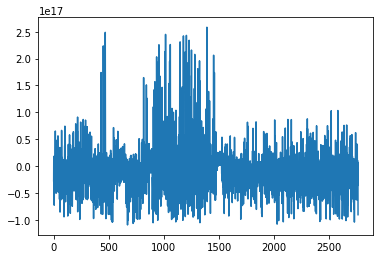

In [18]:
plt.plot(test["diff"])

In [19]:
test["diff"].describe()

count                          2762
mean     -115 days +09:47:03.523533
std        513 days 17:34:56.422907
min            -1266 days +07:48:26
25%      -376 days +16:00:32.250000
50%             -150 days +17:12:46
75%         83 days 06:13:21.750000
max              2988 days 15:55:25
Name: diff, dtype: object

In [20]:
sum(test["diff"] <= pd.Timedelta(days = 0))

1834

In [21]:
len(case_attrited["ACCOUNTID"].unique())

2762

In [22]:
test1 = case_attrited.groupby(["ACCOUNTID","CREATEYEAR","CREATEMONTH"],as_index=False)["index"].agg('count')
test1.describe()

,CREATEYEAR,CREATEMONTH,index
count,16885.000000,16885.000000,16885.000000
mean,2016.183536,6.054605,2.259520
std,1.033272,3.360388,2.920457
min,2015.000000,1.000000,1.000000
25%,2015.000000,3.000000,1.000000
50%,2016.000000,6.000000,1.000000
75%,2017.000000,9.000000,2.000000
max,2018.000000,12.000000,85.000000


In [23]:
case_not_attrited = case[~(case["ACCOUNTID"].isin(attrited.CUSTOMER__C))]
case_not_attrited = case_not_attrited.reset_index()
case_not_attrited["CREATEDDATE"] = pd.to_datetime(case_not_attrited['CREATEDDATE'])
case_not_attrited = case_not_attrited[case_not_attrited["CREATEDDATE"] <= datetime.datetime(2018, 8, 1)]
case_not_attrited["CREATEYEAR"] = case_not_attrited["CREATEDDATE"].dt.year
case_not_attrited["CREATEMONTH"] = case_not_attrited["CREATEDDATE"].dt.month
test2 = case_not_attrited.groupby(["ACCOUNTID","CREATEYEAR","CREATEMONTH"],as_index=False)["index"].agg('count')
test2.describe()

,CREATEYEAR,CREATEMONTH,index
count,156397.000000,156397.000000,156397.000000
mean,2016.295862,6.011842,2.455834
std,1.038018,3.371670,5.287666
min,2015.000000,1.000000,1.000000
25%,2015.000000,3.000000,1.000000
50%,2016.000000,6.000000,1.000000
75%,2017.000000,9.000000,3.000000
max,2018.000000,12.000000,603.000000


In [34]:
test4 = t[(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test4 = test4.groupby(["CUSTOMER__C"], as_index=False)["ID"].agg("count")
test4 = test4[test4.ID <= test4.ID.quantile(0.9)]
print(test4.ID.describe())

count    5986.000000
mean        4.358503
std         3.946439
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        18.000000
Name: ID, dtype: float64


In [35]:
test5 = t[~(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test5 = test5.groupby(["CUSTOMER__C"], as_index=False)["ID"].agg("count")
test5 = test5[test5.ID <= test5.ID.quantile(0.9)]
print(test5.ID.describe())

count    8711.000000
mean        6.086098
std         5.102187
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        23.000000
Name: ID, dtype: float64


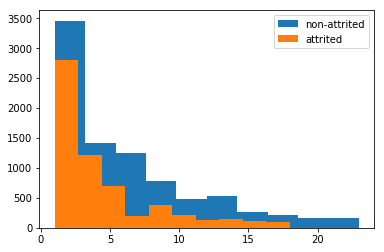

In [41]:
plt.hist(test5.ID)
plt.hist(test4.ID)
plt.legend(["non-attrited", "attrited"])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x124ba5e10>,
 'caps': [<matplotlib.lines.Line2D at 0x124baa860>,
 'fliers': [<matplotlib.lines.Line2D at 0x124bb35c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x124bb3198>,
 'whiskers': [<matplotlib.lines.Line2D at 0x124ba5f60>,
  <matplotlib.lines.Line2D at 0x124bb7278>]}

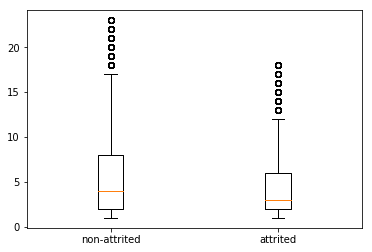

In [42]:
plt.boxplot([test5.ID, test4.ID], labels=["non-attrited", "attrited"])

In [43]:
t

,ID,AGREEMENT_END_DATE__C,AGREEMENT_START_DATE__C,PRODUCT__C,QUANTITY__C,TYPE__C,CUSTOMER__C
221,a1L13000005SkuCEAS,2018-05-04,2017-05-05,01t130000053tBWAAY,2500.0,Renewal,0011300001l4LkBAAU
237,a1L13000005RlpoEAC,2017-10-30,2016-10-31,01t13000005D6ggAAC,1300.0,New,0011300001l4DziAAE
238,a1L13000005RlppEAC,2017-10-30,2016-10-31,01t13000005D6gnAAC,1300.0,New,0011300001l4DziAAE
243,a1L13000005S4lUEAS,2018-01-30,2017-01-31,01ta0000003yJWzAAM,2000.0,Renewal,0013000000z8wQ8AAI
253,a1L13000005SkVDEA0,2018-03-21,2017-03-22,01t13000005D6qAAAS,75.0,New,0011300001hAbraAAC
254,a1L130000086wOeEAI,2018-04-13,2017-04-14,01ta0000004uzTRAAY,-50.0,Volume,001a000001NIHxYAAX
258,a1L13000005SkkxEAC,2017-02-28,2017-02-01,01ta0000004vvZZAAY,2867.0,Volume,0011300001bMYnAAAW
259,a1L13000005SkkyEAC,2017-02-28,2017-02-01,01t30000002FY2ZAAW,2867.0,Volume,0011300001bMYnAAAW
260,a1L13000005SkkzEAC,2017-02-28,2017-02-01,01t30000002FY46AAG,2867.0,Volume,0011300001bMYnAAAW
271,a1L130000086wMdEAI,2018-06-21,2017-06-22,01t13000005sC2JAAU,7500.0,Renewal,0011300001l4I8pAAE


In [51]:
test6 = t[(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test6 = test6.groupby(["CUSTOMER__C"], as_index=False)["QUANTITY__C"].agg("sum")
test6 = test6[test6.QUANTITY__C <= test6.QUANTITY__C.quantile(0.9)]
print(test6.QUANTITY__C.describe())

count     5939.000000
mean       558.568109
std        803.584739
min     -13001.000000
25%         60.000000
50%        224.000000
75%        701.000000
max       3908.000000
Name: QUANTITY__C, dtype: float64


In [52]:
test7 = t[~(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test7 = test7.groupby(["CUSTOMER__C"], as_index=False)["QUANTITY__C"].agg("sum")
test7 = test7[test7.QUANTITY__C <= test7.QUANTITY__C.quantile(0.9)]
print(test7.QUANTITY__C.describe())

count     8687.000000
mean      1808.417981
std       2458.282334
min      -5162.000000
25%        210.000000
50%        752.000000
75%       2300.500000
max      11894.000000
Name: QUANTITY__C, dtype: float64


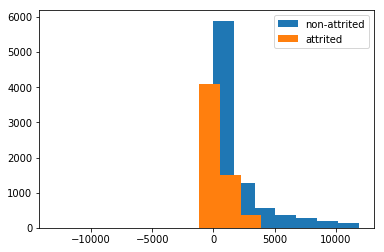

In [53]:
plt.hist(test7.QUANTITY__C)
plt.hist(test6.QUANTITY__C)
plt.legend(["non-attrited", "attrited"])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x12a1586a0>,
 'caps': [<matplotlib.lines.Line2D at 0x12a15c0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a15cd68>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a15c940>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12a1587f0>,
  <matplotlib.lines.Line2D at 0x12a15fa20>]}

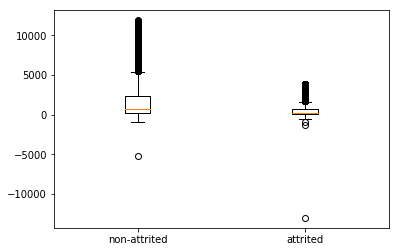

In [54]:
plt.boxplot([test7.QUANTITY__C, test6.QUANTITY__C], labels=["non-attrited", "attrited"])

In [77]:
test8 = t[(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test9 = test8.groupby(["CUSTOMER__C"], as_index=False)["AGREEMENT_START_DATE__C"].agg("min")
test10 = test8.groupby(["CUSTOMER__C"], as_index=False)["AGREEMENT_END_DATE__C"].agg("max")
test11 = test9.join(test10.set_index('CUSTOMER__C'), on='CUSTOMER__C')
test11["relationship"] = test11["AGREEMENT_END_DATE__C"] - test11["AGREEMENT_START_DATE__C"]
test11 = test11[test11.relationship <= test11.relationship.quantile(0.9)]
test11.relationship.describe()

count                        5951
mean     641 days 05:18:26.435893
std      434 days 13:28:11.782322
min               0 days 00:00:00
25%             364 days 00:00:00
50%             454 days 00:00:00
75%             963 days 12:00:00
max            1826 days 00:00:00
Name: relationship, dtype: object

In [78]:
test12 = t[~(t["CUSTOMER__C"].isin(attrited.CUSTOMER__C))]
test13 = test12.groupby(["CUSTOMER__C"], as_index=False)["AGREEMENT_START_DATE__C"].agg("min")
test14 = test12.groupby(["CUSTOMER__C"], as_index=False)["AGREEMENT_END_DATE__C"].agg("max")
test15 = test13.join(test14.set_index('CUSTOMER__C'), on='CUSTOMER__C')
test15["relationship"] = test15["AGREEMENT_END_DATE__C"] - test15["AGREEMENT_START_DATE__C"]
test15 = test15[test15.relationship <= test15.relationship.quantile(0.9)]
test15.relationship.describe()

count                        8729
mean     781 days 16:00:26.394776
std      417 days 03:59:29.417867
min             -1 days +00:00:00
25%             364 days 00:00:00
50%             730 days 00:00:00
75%            1095 days 00:00:00
max            2190 days 00:00:00
Name: relationship, dtype: object

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x12d8d4c18>,
 'caps': [<matplotlib.lines.Line2D at 0x12d8e0e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12d8e3ac8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12d8e36a0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12d8e0550>,
  <matplotlib.lines.Line2D at 0x12d8e6780>]}

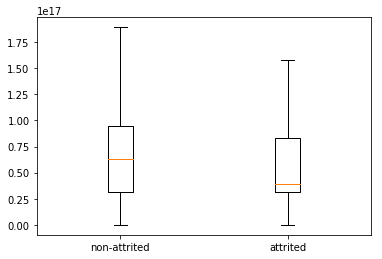

In [79]:
plt.boxplot([test15.relationship, test11.relationship], labels=["non-attrited", "attrited"])